In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv("training.csv")

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2044 entries, 0 to 2043
Data columns (total 94 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   anorexia                2044 non-null   int64 
 1   abdominal_pain          2044 non-null   int64 
 2   anaemia                 2044 non-null   int64 
 3   abortions               2044 non-null   int64 
 4   acetone                 2044 non-null   int64 
 5   aggression              2044 non-null   int64 
 6   arthrogyposis           2044 non-null   int64 
 7   ankylosis               2044 non-null   int64 
 8   anxiety                 2044 non-null   int64 
 9   bellowing               2044 non-null   int64 
 10  blood_loss              2044 non-null   int64 
 11  blood_poisoning         2044 non-null   int64 
 12  blisters                2044 non-null   int64 
 13  colic                   2044 non-null   int64 
 14  Condemnation_of_livers  2044 non-null   int64 
 15  conj

In [4]:
#Replace the values in the imported file by pandas by the inbuilt function replace in pandas.

df.replace({'prognosis':{'mastitis':0,'blackleg':1,'bloat':2,'coccidiosis':3,'cryptosporidiosis':4,
'displaced_abomasum':5,'gut_worms':6,'listeriosis':7,'liver_fluke':8,'necrotic_enteritis':9,'peri_weaning_diarrhoea':10,
'rift_valley_fever':11,'rumen_acidosis':12,
'traumatic_reticulitis':13,'calf_diphtheria':14,'foot_rot':15,'foot_and_mouth':16,'ragwort_poisoning':17,'wooden_tongue':18,'infectious_bovine_rhinotracheitis':19,
'acetonaemia':20,'fatty_liver_syndrome':21,'calf_pneumonia':22,'schmallen_berg_virus':23,'trypanosomosis':24,'fog_fever':25}},inplace=True)

In [5]:
df.tail()

,anorexia,abdominal_pain,anaemia,abortions,acetone,aggression,arthrogyposis,ankylosis,anxiety,bellowing,...,udder_heat,udder_hardeness,udder_redness,udder_pain,unwillingness_to_move,ulcers,vomiting,weight_loss,weakness,prognosis
2039,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,12
2040,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,12
2041,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,12
2042,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12
2043,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,13


In [6]:
#List of the all symptoms is listed here in list sym.

sym=['anorexia','abdominal_pain','anaemia','abortions','acetone','aggression','arthrogyposis',
    'ankylosis','anxiety','bellowing','blood_loss','blood_poisoning','blisters','colic','Condemnation_of_livers',
    'coughing','depression','discomfort','dyspnea','dysentery','diarrhoea','dehydration','drooling',
    'dull','decreased_fertility','diffculty_breath','emaciation','encephalitis','fever','facial_paralysis','frothing_of_mouth',
    'frothing','gaseous_stomach','highly_diarrhoea','high_pulse_rate','high_temp','high_proportion','hyperaemia','hydrocephalus',
    'isolation_from_herd','infertility','intermittent_fever','jaundice','ketosis','loss_of_appetite','lameness',
    'lack_of-coordination','lethargy','lacrimation','milk_flakes','milk_watery','milk_clots',
    'mild_diarrhoea','moaning','mucosal_lesions','milk_fever','nausea','nasel_discharges','oedema',
    'pain','painful_tongue','pneumonia','photo_sensitization','quivering_lips','reduction_milk_vields','rapid_breathing',
    'rumenstasis','reduced_rumination','reduced_fertility','reduced_fat','reduces_feed_intake','raised_breathing','stomach_pain',
    'salivation','stillbirths','shallow_breathing','swollen_pharyngeal','swelling','saliva','swollen_tongue',
    'tachycardia','torticollis','udder_swelling','udder_heat','udder_hardeness','udder_redness','udder_pain','unwillingness_to_move',
    'ulcers','vomiting','weight_loss','weakness']

#List of Diseases (26 Cattle Diseases Mention) is listed in list disease.

disease=['mastitis','blackleg','bloat','coccidiosis','cryptosporidiosis',
        'displaced_abomasum','gut_worms','listeriosis','liver_fluke','necrotic_enteritis','peri_weaning_diarrhoea',
        ' rift_valley_fever','rumen_acidosis',
        'traumatic_reticulitis','calf_diphtheria','foot_rot','foot_and_mouth','ragwort_poisoning','wooden_tongue','infectious_bovine_rhinotracheitis',
'acetonaemia','fatty_liver_syndrome','calf_pneumonia','schmallen_berg_virus','trypanosomosis','fog_fever']

In [7]:
print(len(sym))

92


In [8]:
l2=[]
for i in range(0,len(sym)):
    l2.append(0)
print(l2)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


## graphs

In [9]:
# from sklearn.metrics import confusion_matrix

# actual_labels = df['actual_labels']
# predicted_labels = df['predicted_labels']

# cm = confusion_matrix(actual_labels, predicted_labels)
# print(cm)


In [10]:
# correlation = df.corr()
# # print(correlation_matrix)

# sns.heatmap(correlation, annot=True, cmap='coolwarm')
# plt.title('Correlation Heatmap')
# plt.show()

In [11]:

# # Split the dataframe into training and testing sets
# train, test = train_test_split(df, test_size=0.2, random_state=42)

# print(test.info())


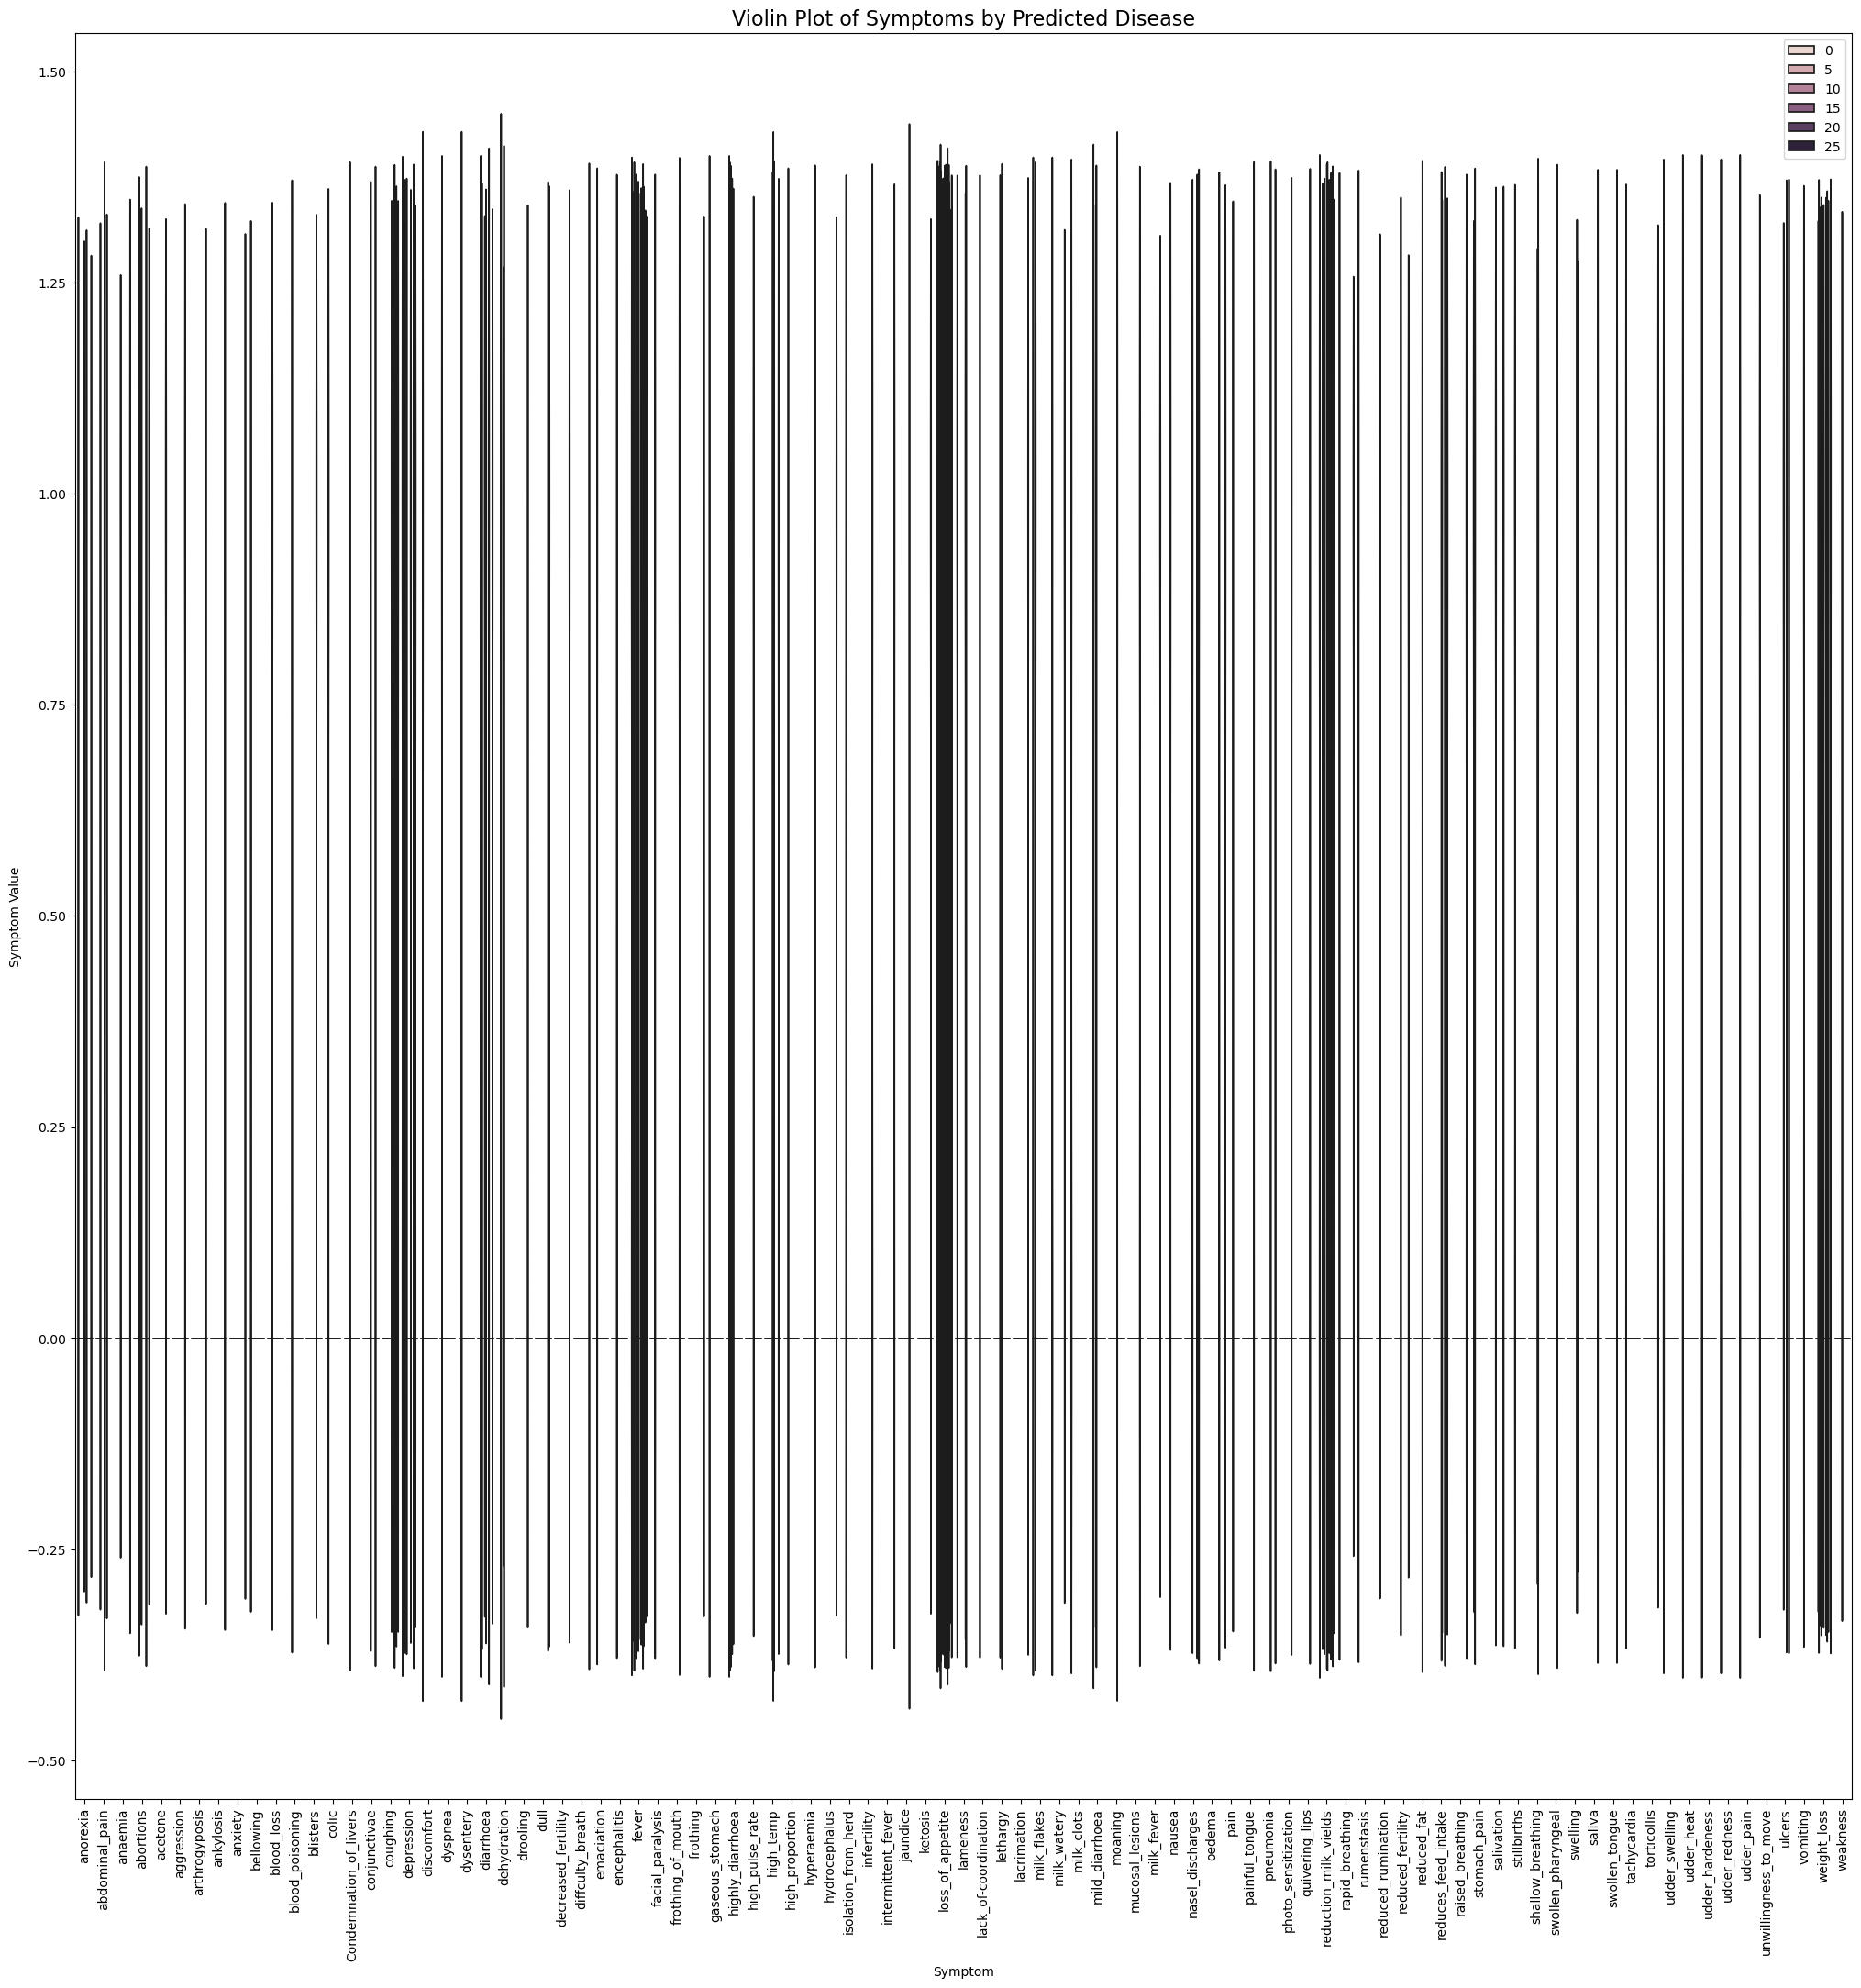

In [34]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# import pandas as pd

# # Melt the DataFrame to long format for creating violin plots
# df_melted = pd.melt(df, id_vars='prognosis', var_name='Symptom', value_name='Symptom Value')

# # Set up the matplotlib figure
# plt.figure(figsize=(25, 25))

# # Create a violin plot using Seaborn
# sns.violinplot(x='Symptom', y='Symptom Value', hue='prognosis', data=df_melted, split=False, inner='quart', palette='muted')

# ax = plt.gca()

# # Rotate x-axis labels by 90 degrees
# ax.set_xticks(ax.get_xticks())
# ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# # Set the title of the plot
# plt.title('Violin Plot of Symptoms by Predicted Disease', fontsize=16)

# # Set the location of the legend explicitly
# plt.legend(loc='upper right')

# # Show the plot
# plt.show()

In [13]:
X = df[sym]
y = df["prognosis"]
np.ravel(y)
X

,anorexia,abdominal_pain,anaemia,abortions,acetone,aggression,arthrogyposis,ankylosis,anxiety,bellowing,...,udder_swelling,udder_heat,udder_hardeness,udder_redness,udder_pain,unwillingness_to_move,ulcers,vomiting,weight_loss,weakness
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2039,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2040,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2041,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2042,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
tr=pd.read_csv("testing.csv")

#eplace in pandas for replacing the values

tr.replace({'prognosis':{'mastitis':0,'blackleg':1,'bloat':2,'coccidiosis':3,'cryptosporidiosis':4,
'displaced_abomasum':5,'gut_worms':6,'listeriosis':7,'liver_fluke':8,'necrotic_enteritis':9,'peri_weaning_diarrhoea':10,
'rift_valley_fever':11,'rumen_acidosis':12,
'traumatic_reticulitis':13,'calf_diphtheria':14,'foot_rot':15,'foot_and_mouth':16,'ragwort_poisoning':17,'wooden_tongue':18,'infectious_bovine_rhinotracheitis':19,
'acetonaemia':20,'fatty_liver_syndrome':21,'calf_pneumonia':22,'schmallen_berg_virus':23,'trypanosomosis':24,'fog_fever':25}},inplace=True)
tr.head()

,anorexia,abdominal_pain,anaemia,abortions,acetone,aggression,arthrogyposis,ankylosis,anxiety,bellowing,...,udder_heat,udder_hardeness,udder_redness,udder_pain,unwillingness_to_move,ulcers,vomiting,weight_loss,weakness,prognosis
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,11
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
3,1,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,23
4,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,0,0,0,0,0,0


In [15]:
X_test= tr[sym]
y_test = tr[["prognosis"]]
np.ravel(y_test)

array([ 1, 11, 15, 23,  0,  2,  3,  4,  5,  6,  7,  8,  9, 10, 12, 13, 14,
       16, 17, 18, 19, 20, 21, 22, 24, 25])

In [16]:
print(X_test)

    anorexia  abdominal_pain  anaemia  abortions  acetone  aggression  \
0          1               0        0          0        0           0   
1          1               0        0          1        0           0   
2          1               0        0          0        0           0   
3          1               0        0          0        0           0   
4          0               0        0          0        0           0   
5          0               0        0          0        0           0   
6          0               0        0          0        0           0   
7          0               0        0          0        0           0   
8          0               0        0          0        0           0   
9          0               1        0          0        0           0   
10         0               0        0          1        0           0   
11         0               0        1          0        0           0   
12         0               0        0          0   

### Decision Tree classifier

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score


# Create a Decision Tree classifier
dt = DecisionTreeClassifier()

# Train the model
dt.fit(X, y)

# Make predictions on the test set
y_pred = dt.predict(X_test)

# Calculate the performance score (accuracy)
dtc_score = accuracy_score(y_test, y_pred)

# Calculate the F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the F1 score
print("F1 score:", f1)

# Calculate the classification report
# report = classification_report(y_test, y_pred)

# # Print the classification report
# print(report)


# Calculate the cross-validation score
cv_scores = cross_val_score(dt, X, y, cv=5)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Print the performance score
print("Performance score:", dtc_score)

F1 score: 1.0
Cross-validation scores: [1. 1. 1. 1. 1.]
Performance score: 1.0


In [18]:
conf_matrix=confusion_matrix(y_test,y_pred)
print(conf_matrix)

[[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 

In [19]:
print(l2)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [20]:

psymptoms = ['anorexia','tachycardia','anaemia','lameness','loss_of_appetite']

l2=[]
for i in range(0,len(sym)):
    l2.append(0)             # sanitaising
for k in range(0,len(sym)):
    for z in psymptoms:
        if(z==sym[k]):
            l2[k]=1

inputtest = [l2]
predict = dt.predict(inputtest)
dt_predicted=predict[0]
# print(predict)
# print(predicted)
h='no'
for a in range(0,len(disease)):
    if(dt_predicted == a):
        h='yes'
        break

if (h=='yes'):
    print(disease[a])
else:
    print("Not Found")


trypanosomosis


/home/sam/.local/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [21]:
print(l2)

[1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


### Random Forest classifier

In [22]:
from sklearn.ensemble import RandomForestClassifier


# Create a Random Forest classifier
rf = RandomForestClassifier(n_estimators=100)

# Train the model
rf.fit(X, y)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Calculate the performance score (accuracy)
rf_score = accuracy_score(y_test, y_pred)

# Calculate the classification report
# report = classification_report(y_test, y_pred)

cv_scores = cross_val_score(dt, X, y, cv=5)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
# Print the classification report
# print(report)
# Print the performance score
print("Performance score:", rf_score)

Cross-validation scores: [1. 1. 1. 1. 1.]
Performance score: 1.0


In [23]:
psymptoms = ['unwillingness_to_move','tachycardia','rapid_breathing','lameness','loss_of_appetite']

l2=[]
for i in range(0,len(sym)):
    l2.append(0)
# l2 = CLEAN_L2 # sanitaising
# print(CLEAN_L2)
for k in range(0,len(sym)):
    for z in psymptoms:
        if(z==sym[k]):
            l2[k]=1

inputtest = [l2]
predict = rf.predict(inputtest)
rf_predicted=predict[0]
# print(predict)
# print(predicted)
h='no'
for a in range(0,len(disease)):
    if(rf_predicted == a):
        h='yes'
        break

if (h=='yes'):
    print(disease[a])
else:
    print("Not Found")


blackleg


/home/sam/.local/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [24]:
print(l2)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]


### Naive Bayes Algorithm

In [25]:
from sklearn.naive_bayes import GaussianNB

# Create a Naive Bayes Algorithm
gnb = GaussianNB()

# Train the model
gnb.fit(X, y)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Calculate the performance score (accuracy)
rf_score = accuracy_score(y_test, y_pred)

# Calculate the classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)
# Print the performance score
print("Performance score:", rf_score)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         1
          16       1.00      1.00      1.00         1
          17       1.00    

In [26]:
psymptoms = ['unwillingness_to_move','tachycardia','rapid_breathing','lameness','loss_of_appetite']

l2=[]
for i in range(0,len(sym)):
    l2.append(0)         # sanitaising
for k in range(0,len(sym)):
    for z in psymptoms:
        if(z==sym[k]):
            l2[k]=1

inputtest = [l2]
predict = gnb.predict(inputtest)
gnb_predicted=predict[0]
# print(predict)
# print(predicted)
h='no'
for a in range(0,len(disease)):
    if(gnb_predicted == a):
        h='yes'
        break

if (h=='yes'):
    print(disease[a])
else:
    print("Not Found")


blackleg


/home/sam/.local/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [27]:
print(l2)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]


### KNN classifier

In [28]:
from sklearn.neighbors import KNeighborsClassifier


# Create a KNN classifier
knn = KNeighborsClassifier()

# Train the model
knn=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
knn.fit(X, y)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Calculate the performance score (accuracy)
knn_score = accuracy_score(y_test, y_pred)

# Calculate the classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)

# Print the performance score
print("Performance score:", knn_score)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         1
          16       1.00      1.00      1.00         1
          17       1.00    

In [29]:
psymptoms = ['pneumonia','saliva','weakness','hyperaemia','ketosis']

l2=[]
for i in range(0,len(sym)):
    l2.append(0)             # sanitaising
for k in range(0,len(sym)):
    for z in psymptoms:
        if(z==sym[k]):
            l2[k]=1

inputtest = [l2]
inputtest = np.array(inputtest)
predict = knn.predict(inputtest)
knn_predicted=predict[0]

# print(predicted)
h='no'
for a in range(0,len(disease)):
    if(knn_predicted == a):
        h='yes'
        break

if (h=='yes'):
    print(disease[a])
else:
    print("Not Found")


 rift_valley_fever


/home/sam/.local/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [30]:
print(l2)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]


### remedy recommendation


In [31]:

def remedy(disease):
    remedies = {
    'mastitis': 'Isolate the infected cow, use appropriate antibiotics, and maintain proper hygiene during milking.',
    'blackleg': 'Vaccinate cattle against blackleg, and provide prompt treatment with antibiotics if symptoms occur.',
    'bloat': 'Introduce anti-bloat medications, provide access to fresh water, and ensure proper grazing management.',
    'coccidiosis': 'Administer coccidiostats, maintain clean living conditions, and provide proper nutrition.',
    'cryptosporidiosis': 'Implement strict hygiene practices, provide supportive care, and administer appropriate medications.',
    'displaced_abomasum': 'Consult with a veterinarian for proper diagnosis and treatment, which may include surgery.',
    'gut_worms': 'Administer anthelmintic medications and practice good pasture management.',
    'listeriosis': 'Use antibiotics for treatment, improve hygiene, and provide proper nutrition.',
    'liver_fluke': 'Implement measures to control snail intermediate hosts and use anthelmintic medications.',
    'necrotic_enteritis': 'Administer antibiotics and improve overall flock management and hygiene.',
    'peri_weaning_diarrhoea': 'Implement proper nutrition, hygiene, and consider antibiotic treatment.',
    'rift_valley_fever': 'Vaccinate animals, practice vector control, and ensure proper hygiene.',
    'rumen_acidosis': 'Adjust the diet to prevent acidosis, provide access to clean water, and use buffers.',
    'traumatic_reticulitis': 'Consult with a veterinarian for proper diagnosis and treatment, which may include surgery.',
    'calf_diphtheria': 'Administer antibiotics, provide supportive care, and improve living conditions.',
    'foot_rot': 'Implement proper foot hygiene, provide hoof care, and use appropriate medications.',
    'foot_and_mouth': 'Quarantine affected animals, practice strict biosecurity, and consider vaccination.',
    'ragwort_poisoning': 'Remove ragwort plants from pastures, and provide supportive care to affected animals.',
    'wooden_tongue': 'Administer antibiotics, provide soft and easily chewable feed, and improve oral hygiene.',
    'infectious_bovine_rhinotracheitis': 'Vaccinate against IBR, isolate affected animals, and provide supportive care.',
    'acetonaemia': 'Adjust the diet, provide proper nutrition, and consult with a veterinarian for treatment.',
    'fatty_liver_syndrome': 'Improve diet and nutrition, provide proper care, and consult with a veterinarian for treatment.',
    'calf_pneumonia': 'Vaccinate against respiratory pathogens, provide proper ventilation, and administer antibiotics.',
    'schmallen_berg_virus': 'Vaccinate against SBV, practice vector control, and provide supportive care.',
    'trypanosomosis': 'Use trypanocidal medications, control vectors, and provide supportive care.',
    'fog_fever': 'Implement preventive measures, provide supportive care, and consult with a veterinarian for treatment.',
    }
    print(f'As a basic remedy for {disease} we recommend to {remedies[disease]}')



#### get the most common prediction

In [32]:
from collections import Counter
predictions = [dt_predicted, rf_predicted, gnb_predicted, knn_predicted]
print(predictions)

# Count the occurrences of each number in predictions
prediction_counts = Counter(predictions)

# Find the most prediction and its count
recurring_number, count = prediction_counts.most_common(1)[0]

# Print the most prediction
if count > 1:
    for a in range(0,len(disease)):
        if(recurring_number == a):
            remedy(disease[a])
            # print(disease[a])
else:
    if count == 1:
        Ranf = predictions[1]
        remedy(disease[Ranf])
        # print(disease[Ranf]) # If there is no recurring number, print the second number in predictions


[24, 1, 1, 11]
As a basic remedy for blackleg we recommend to Vaccinate cattle against blackleg, and provide prompt treatment with antibiotics if symptoms occur.
